In [127]:
import pandas as pd

data = pd.read_csv('Thyroid Dataset.csv')
print(data.head())


  age sex on thyroxine query on thyroxine on antithyroid medication sick  \
0  41   F            f                  f                         f    f   
1  23   F            f                  f                         f    f   
2  46   M            f                  f                         f    f   
3  70   F            t                  f                         f    f   
4  70   F            f                  f                         f    f   

  pregnant thyroid surgery I131 treatment query hypothyroid  ... TT4 measured  \
0        f               f              f                 f  ...            t   
1        f               f              f                 f  ...            t   
2        f               f              f                 f  ...            t   
3        f               f              f                 f  ...            t   
4        f               f              f                 f  ...            t   

   TT4 T4U measured   T4U FTI measured  FTI TBG measured

In [128]:
print(data['binaryClass'].value_counts())

binaryClass
P    3481
N     291
Name: count, dtype: int64


In [129]:
data['binaryClass'] = data['binaryClass'].str.upper()

In [130]:
data['binaryClass'] = data['binaryClass'].map({'P': 1, 'N': 0})

In [131]:
print(data['sex'].value_counts())

sex
F    2480
M    1142
?     150
Name: count, dtype: int64


In [133]:
data = data.applymap(lambda x: 1 if x == 't' else (0 if x == 'f' else x))

C:\Users\HP\AppData\Local\Temp\ipykernel_2328\998886094.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: 1 if x == 't' else (0 if x == 'f' else x))


In [134]:
data['sex'] = data['sex'].map({'F': 0, 'M': 1})


In [135]:
print(data.head())

  age  sex  on thyroxine  query on thyroxine  on antithyroid medication  sick  \
0  41  0.0             0                   0                          0     0   
1  23  0.0             0                   0                          0     0   
2  46  1.0             0                   0                          0     0   
3  70  0.0             1                   0                          0     0   
4  70  0.0             0                   0                          0     0   

   pregnant  thyroid surgery  I131 treatment  query hypothyroid  ...  \
0         0                0               0                  0  ...   
1         0                0               0                  0  ...   
2         0                0               0                  0  ...   
3         0                0               0                  0  ...   
4         0                0               0                  0  ...   

   TT4 measured  TT4  T4U measured   T4U  FTI measured  FTI  TBG measured TBG  \

In [136]:
data.replace('?', pd.NA, inplace=True)
data.fillna(0, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2328\124659752.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.fillna(0, inplace=True)


In [137]:
from sklearn.model_selection import train_test_split

X = data.drop('binaryClass', axis=1)
y = data['binaryClass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Number of samples in the training set: {X_train.shape[0]}")
print(f"Number of samples in the test set: {X_test.shape[0]}")

Number of samples in the training set: 3017
Number of samples in the test set: 755


In [138]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['referral source'] = label_encoder.fit_transform(data['referral source'])

print(data.head())


  age  sex  on thyroxine  query on thyroxine  on antithyroid medication  sick  \
0  41  0.0             0                   0                          0     0   
1  23  0.0             0                   0                          0     0   
2  46  1.0             0                   0                          0     0   
3  70  0.0             1                   0                          0     0   
4  70  0.0             0                   0                          0     0   

   pregnant  thyroid surgery  I131 treatment  query hypothyroid  ...  \
0         0                0               0                  0  ...   
1         0                0               0                  0  ...   
2         0                0               0                  0  ...   
3         0                0               0                  0  ...   
4         0                0               0                  0  ...   

   TT4 measured  TT4  T4U measured   T4U  FTI measured  FTI  TBG measured TBG  \

In [139]:
X = data.drop(columns=['binaryClass'])
y = data['binaryClass']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

model = LogisticRegression(max_iter=10000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy*100:.2f}%")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model accuracy: 96.03%
Confusion Matrix:
[[ 31  27]
 [  3 694]]


In [141]:
import numpy as np
from sklearn.metrics import classification_report

y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

threshold = 0.4  # You can change the threshold here
y_pred_threshold = (y_probs >= threshold).astype(int)

print(f"Classification report with threshold {threshold}:")
print(classification_report(y_test, y_pred_threshold))


Classification report with threshold 0.4:
              precision    recall  f1-score   support

           0       0.91      0.52      0.66        58
           1       0.96      1.00      0.98       697

    accuracy                           0.96       755
   macro avg       0.94      0.76      0.82       755
weighted avg       0.96      0.96      0.95       755



In [142]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)

tree_model.fit(X_train, y_train)

y_pred_tree = tree_model.predict(X_test)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Decision Tree model accuracy: {accuracy_tree*100:.2f}%")

# Displaying the confusion matrix
print("Decision Tree confusion matrix:")
print(confusion_matrix(y_test, y_pred_tree))


Decision Tree model accuracy: 99.47%
Decision Tree confusion matrix:
[[ 55   3]
 [  1 696]]


In [143]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest model accuracy: {accuracy_rf*100:.2f}%")

print("Random Forest confusion matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest model accuracy: 99.87%
Random Forest confusion matrix:
[[ 58   0]
 [  1 696]]


In [144]:
from sklearn.svm import SVC

svm_model = SVC(probability=True, random_state=42)

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM model accuracy: {accuracy_svm*100:.2f}%")

print("SVM model confusion matrix:")
print(confusion_matrix(y_test, y_pred_svm))


SVM model accuracy: 94.97%
SVM model confusion matrix:
[[ 23  35]
 [  3 694]]


In [145]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5)  # cv=5 means 5 splits

print(f"Cross-Validation results for the Logistic Regression model:")
print(cv_scores)
print(f"Average: {np.mean(cv_scores):.2f}")


Cross-Validation results for the Logistic Regression model:
[0.95529801 0.95860927 0.96517413 0.96185738 0.95522388]
Average: 0.96


In [146]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],  # The C parameter in Logistic Regression
    'solver': ['liblinear', 'saga']  # Solver algorithms
}

grid_search = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

y_pred_grid = grid_search.best_estimator_.predict(X_test)

accuracy_grid = accuracy_score(y_test, y_pred_grid)
print(f"Model accuracy after GridSearch: {accuracy_grid*100:.2f}%")


Best parameters: {'C': 10, 'solver': 'liblinear'}
Model accuracy after GridSearch: 96.69%


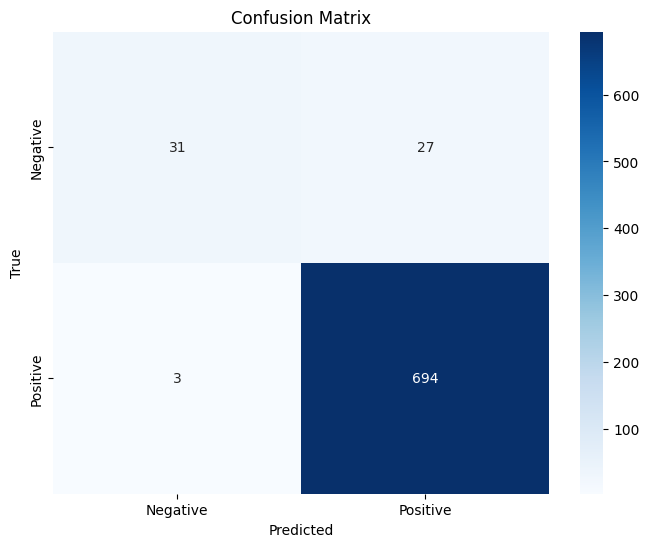

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [52]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

print(report)


              precision    recall  f1-score   support

           0       0.91      0.53      0.67        58
           1       0.96      1.00      0.98       697

    accuracy                           0.96       755
   macro avg       0.94      0.77      0.83       755
weighted avg       0.96      0.96      0.96       755



C:\Users\HP\AppData\Local\Temp\ipykernel_2328\2991557430.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette='coolwarm', label="Predicted Class")
C:\Users\HP\AppData\Local\Temp\ipykernel_2328\2991557430.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_test, palette='dark', alpha=0.5, label="True Class")


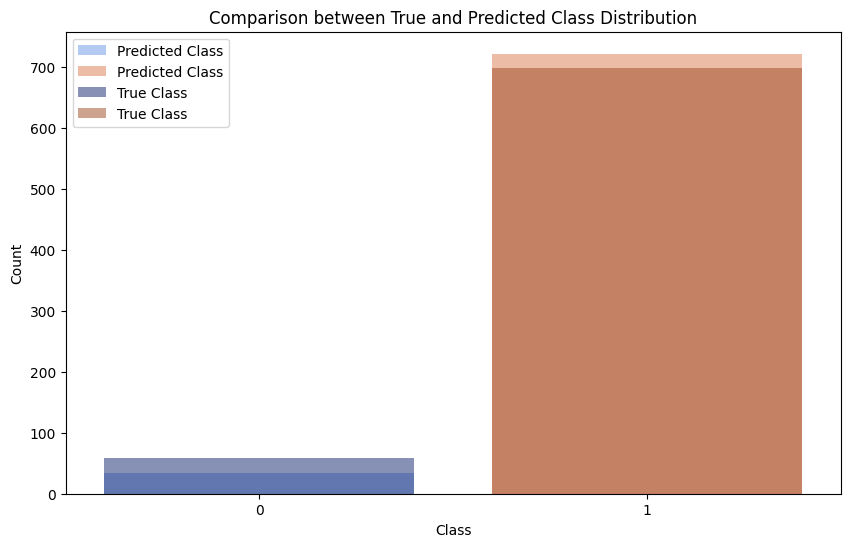

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x=y_pred, palette='coolwarm', label="Predicted Class")
sns.countplot(x=y_test, palette='dark', alpha=0.5, label="True Class")
plt.title("Comparison between True and Predicted Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.legend()
plt.show()


In [55]:
print("Length of X_pca:", len(X_pca))
print("Length of y_pred:", len(y_pred))


Length of X_pca: 3772
Length of y_pred: 755


Length of X_test_pca: 755
Length of y_pred: 755


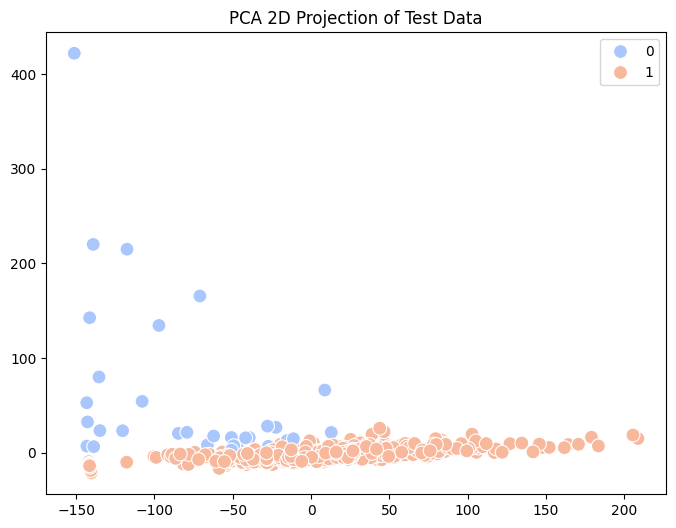

In [ ]:
X_test_pca = pca.transform(X_test)  

print("Length of X_test_pca:", len(X_test_pca))
print("Length of y_pred:", len(y_pred))

if len(X_test_pca) == len(y_pred):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_pred, palette='coolwarm', s=100)
    plt.title("PCA 2D Projection of Test Data")
    plt.show()
else:
    print("The dimensions of X_test_pca and y_pred still do not match.")


Length of X_pca: 755
Length of y_pred: 755


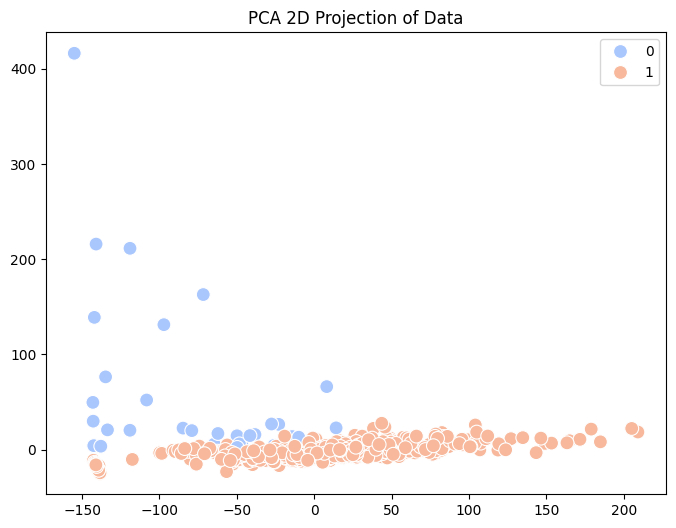

In [117]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

print(f"Length of X_pca: {len(X_pca)}")
print(f"Length of y_pred: {len(y_pred)}")

if len(X_pca) == len(y_pred):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_pred, palette='coolwarm', s=100)
    plt.title("PCA 2D Projection of Data")
    plt.show()
else:
    print("The lengths of X_pca and y_pred are not equal. Please ensure they match.")


In [118]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'max_iter': [100, 200, 500]
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters : {grid_search.best_params_}")


Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best parameters : {'C': 100, 'max_iter': 100, 'solver': 'liblinear'}


In [119]:
from sklearn.linear_model import LogisticRegression

# Define the best model with the optimized hyperparameters
best_model = LogisticRegression(C=100, max_iter=100, solver='liblinear')

# Train the model
best_model.fit(X_train, y_train)

# Calculate accuracy on the test set
accuracy = best_model.score(X_test, y_test)

# Print the accuracy
print(f"Model accuracy after optimization: {accuracy * 100:.2f}%")


Model accuracy after optimization: 97.22%


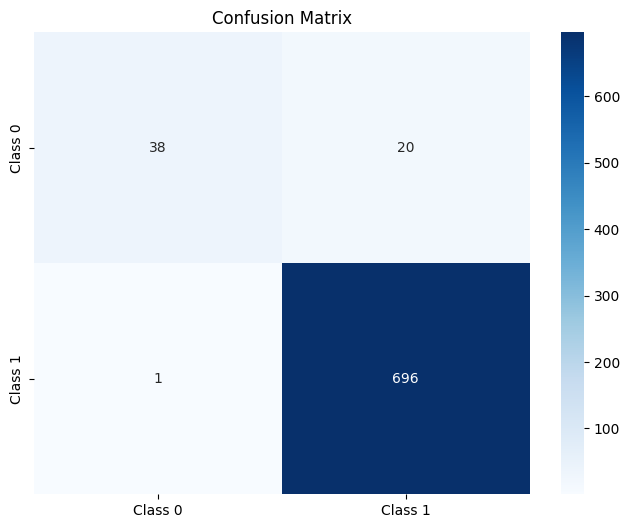

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.show()


In [61]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.66      0.78        58
           1       0.97      1.00      0.99       697

    accuracy                           0.97       755
   macro avg       0.97      0.83      0.88       755
weighted avg       0.97      0.97      0.97       755



In [ ]:
pip install imbalanced-learn


In [ ]:
pip install streamlit


In [148]:
import streamlit as st
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np

# Generate random dataset
X = np.random.rand(1000, 10)  
y = np.random.choice([0, 1], size=(1000,))  

# User interface
st.title("Logistic Regression Model for Data Analysis")
st.write("This web application uses a logistic regression model after applying SMOTE to handle imbalanced data.")

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE on the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train the logistic regression model
model = LogisticRegression(C=100, max_iter=100, solver='liblinear')
model.fit(X_train_res, y_train_res)

# Predict using the test set
y_pred = model.predict(X_test)

# Display classification report
report = classification_report(y_test, y_pred)
st.subheader("Classification Report:")
st.text(report)

# Add file upload feature
st.subheader("Upload Your Data:")
uploaded_file = st.file_uploader("Choose a data file", type=["csv", "xlsx"])
if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)
    st.write(df.head())  # Display first 5 rows of the data


2025-01-07 00:40:41.792 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 00:40:41.793 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 00:40:41.794 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 00:40:41.795 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 00:40:41.796 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 00:40:41.798 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 00:40:41.935 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 00:40:41.938 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [82]:
import joblib

joblib.dump(model, 'logistic_regression_model.pkl')


['logistic_regression_model.pkl']

In [121]:
import joblib
import numpy as np

model = joblib.load('logistic_regression_model.pkl')


features = ['feature1', 'feature2']  
coefficients = model.coef_


print("المعاملات: ", coefficients)

for feature, coefficient in zip(features, coefficients[0]):
    print(f'{feature}: {coefficient}')


المعاملات:  [[-0.16925813  0.14080542  0.07637889 -0.06912851  0.13684881 -0.20286611
   0.01079498 -0.23577532  0.17380057 -0.39535253]]
feature1: -0.1692581323758294
feature2: 0.14080542392960832


In [122]:
import pandas as pd
import numpy as np

columns = ['feature1', 'feature2']  
X_train = np.array([[1, 2], [3, 4], [5, 6]])  
X_train_df = pd.DataFrame(X_train, columns=columns)

print(X_train_df.columns)


Index(['feature1', 'feature2'], dtype='object')


In [123]:
import joblib
import numpy as np

model = joblib.load('logistic_regression_model.pkl')

columns = ['feature1', 'feature2']

coefficients = model.coef_

for feature, coef in zip(columns, coefficients[0]):
    print(f'{feature}: {coef}')


feature1: -0.1692581323758294
feature2: 0.14080542392960832


In [124]:
import streamlit as st
import joblib
import numpy as np

# Load the pre-trained model
model = joblib.load('logistic_regression_model.pkl')

coefficients = model.coef_[0]  # Coefficients for the features
intercept = model.intercept_[0]  # Intercept

# Display model information to the user
st.title('Model Information')
st.write(f"Intercept: {intercept}")
for i, coef in enumerate(coefficients):
    st.write(f"Coefficient for feature {i+1}: {coef}")

# User input
feature1 = st.number_input('Feature 1', min_value=0, max_value=100, value=50)
feature2 = st.number_input('Feature 2', min_value=0, max_value=100, value=50)

# When the user clicks the button
if st.button('Predict'):
    # Arrange inputs in an array
    input_data = np.array([[feature1, feature2]])
    
    # Use the model to make a prediction
    prediction = model.predict(input_data)
    
    # Display the result
    st.write(f'Prediction: {prediction[0]}')


2025-01-07 00:12:48.767 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 00:12:48.768 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 00:12:48.769 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 00:12:48.770 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 00:12:48.770 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 00:12:48.771 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 00:12:48.772 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 00:12:48.773 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [102]:
import os
import joblib

os.makedirs('notebooks', exist_ok=True)

joblib.dump(model, 'notebooks/logistic_regression_model.pkl')


['notebooks/logistic_regression_model.pkl']

In [103]:
model = joblib.load('notebooks/logistic_regression_model.pkl')


In [104]:
joblib.dump(model, 'notebooks/logistic_regression_model.pkl')


['notebooks/logistic_regression_model.pkl']

In [106]:
model = joblib.load(r'C:\Users\HP\OneDrive\Desktop\min project isd\isd\notebooks\logistic_regression_model.pkl')


In [108]:

print(data.head())
print(data.columns)



  age  sex  on thyroxine  query on thyroxine  on antithyroid medication  sick  \
0  41  0.0             0                   0                          0     0   
1  23  0.0             0                   0                          0     0   
2  46  1.0             0                   0                          0     0   
3  70  0.0             1                   0                          0     0   
4  70  0.0             0                   0                          0     0   

   pregnant  thyroid surgery  I131 treatment  query hypothyroid  ...  \
0         0                0               0                  0  ...   
1         0                0               0                  0  ...   
2         0                0               0                  0  ...   
3         0                0               0                  0  ...   
4         0                0               0                  0  ...   

   TT4 measured  TT4  T4U measured   T4U  FTI measured  FTI  TBG measured TBG  \